# SC03 Group 9


| Names | Student ID | Contributions |
| -----| --------- | ------ |
| Chia Kai Xun, Bryan | 1006862 | Problem Statement, Cleaning Data, Conclusion |
| Royce Lim Way Tat | 1006634 | Problem Statement, Cleaning Data, Visualising Data |
| Julianna Sherine | 1007035 | Problem Statement, Sourcing Data, Data Analysis |
| Tan Hong Han | 1006912 | Problem Statement, Sourcing Data, Transformation |



# Problem Statement

## Background description of the problem

ASEAN is a regional intergovernmental organization comprising ten Southeast Asian countries. Singapore is one of the countries in ASEAN. The member countries collaborate on various economic, political, security, and socio-cultural aspects. All of these countries have a relatively higher death rate from malnutrition as compared to singapore. Hence, we were keen to explore the relationship between the death rate resulting from malnutrition and factors such as Gross Domestic Product, Cost of Living and Agricultural Land Use. By finding out a relationship between the death rates from malnutrition and these socioeconomic variables and local production of agriculture, it might be possible to use these variables to predict death rates from malnutrition and take action towards decreasing deaths resulting from malnutrition.

Countries in Southeast Asia (Malaysia, Indonesia, Thailand and the Philippines) was of interest in this project due to their proximity to Singapore. 

## User Persona

User Persona  
Name: Jack Santos <br>
Age: 50 <br>
Job: Ambassador/Permanent Representative of the Philippines to ASEAN <br>
Aim: To decrease the death rates resulting from malnutrition in the Philippines  

Mr Jack Santos is Philippines's representative of ASEAN member states. He observed from data sets that the death rate from protein-energy malnutrition in Philippines is still relatively higher than that of Philippines's ASEAN neighbours, such as Malaysia and Singapore. 

In order to highlight the severity of Philippines's food security issue, he searches online databases for projected values of GDP per capita, CPI, and projected agricultural land use for ASEAN countries. He then uses our prediction model to find the number of projected deaths each country would experience if the problem were left unaddressed, in hopes that he could convince the other ASEAN members to look more closely at this food insecurity issue and ultimately improve the food security of Philippines.

## Final Problem Statement

How might the ASEAN Governments predict the death rate due to malnourishment using Gross Domestic Product (GDP) per Capita, Consumer Price Index (CPI) and Percentage of Agricultural Land Use?

# Data

## Link to Data Sources

| Data | Time Span | Source | Description | Citation |
| -----| --------- | ------ | ----------- | -------- |
| GDP per capita | 1960 - 2022 | The World Bank | Gross Domestic Product per capita (constant 2015 US$) of countries in the world | https://data.worldbank.org/indicator/NY.GDP.PCAP.KD |
| Consumer Price Index | 1960 - 2022 | The World Bank | Consumer Price Index (2010 = 100) of countries in the world | https://data.worldbank.org/indicator/FP.CPI.TOTL |
| Percentage of Agriculture Land Use | 1961 - 2021 | The World Bank | Percentage of Agriculture Land Use of countries in the world | https://data.worldbank.org/indicator/AG.LND.AGRI.ZS |
| Death rate from malnutrition | 1990 - 2019 | Our World in Data | The estimated death rate from protein-energy malnutrition per 100,000 people. | https://ourworldindata.org/grapher/malnutrition-death-rates?time=latest |

## Reasons these data were used

- Death rate from malnutrition refers to the estimated death rate from protein-energy malnutrition per 100,000 people in a given population. It is quantitative in nature and acts an indicator of food insecurity in a population. It is a statistic that incites urgency and a need to solve food insecurity if it rises to a high enough number.

- GDP per capita is chosen as it is commonly used as a measure of economic growth in a country. Hence, it is expected that the higher the economic growth and the more developed a country is, the more people will have access to nutritious food and thus, a lower malnutrition rate.

- CPI measures the change in prices paid by consumers over time, for a representative basket of goods and services. As the prices of goods will be less affordable as CPI increases, locals would be less able to afford these goods which would ultimately lead to an increase in the death rate caused by malnutrition.

- The Percentage of Agricultural Land Use is used to measure how much land is devoted to agriculture and livestock. Hence, having a high percentage would imply a higher production of local food and less reliance on imported food, therefore a lower death rate caused by malnutrition is expected.

## Cleaning Data

In [474]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

### Importing Data

The hidden commented code may not be necessary to import the datasets as another method is used to import the data below.<br>
If using the commented code, you will need to replace the path to the excel file with your own and use forward slash ('/') instead of windows back slash ('\\').

In [475]:
# world_gdp_df = pd.read_excel("Replace with Path/World Bank GDP per capita data.xlsx", skiprows = 4)
# world_cpi = pd.read_excel("Replace with Path/Consumer price index.xlsx", skiprows = 4)
# world_land_use = pd.read_excel("Replace with Path/World percentage agriculture land use.xlsx", skiprows = 4)
# world_death_rate = pd.read_excel("Replace with Path/malnutrition-death-rates.xlsx")

The code below imports the relevant csv files from a github repository. The csv files were originally downloaded from the links to data sources above.

In [476]:
world_gdp_df = pd.read_csv("https://raw.githubusercontent.com/spyabi/DDW-2D-Project/main/World%20Bank%20GDP%20per%20capita%20data.csv", skiprows = 3)
world_cpi = pd.read_csv("https://raw.githubusercontent.com/spyabi/DDW-2D-Project/main/Consumer%20price%20index.csv", skiprows = 3)
world_land_use = pd.read_csv("https://raw.githubusercontent.com/spyabi/DDW-2D-Project/main/World%20percentage%20agriculture%20land%20use.csv", skiprows = 3)
world_death_rate = pd.read_csv("https://raw.githubusercontent.com/spyabi/DDW-2D-Project/main/malnutrition-death-rates.csv")


### Display of Raw Database (Hidden, expand to view)

These show the databases before cleaning

In [477]:
display(world_gdp_df)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,27624.377300,28421.386493,28852.237067,30270.941601,31705.278824,31762.733960,25823.634941,30271.833634,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1179.058077,1151.433058,1210.086966,1238.291625,1259.640033,1290.327575,...,1542.984773,1545.559084,1537.981840,1536.353327,1533.744255,1524.732633,1442.066780,1466.344792,1478.698845,NaN
2,Afghanistan,AFG,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,602.516600,592.476165,590.427367,588.930080,578.985545,584.386515,553.036131,426.229401,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1088.483404,1085.702205,1102.996814,1157.911826,1194.157146,1215.637174,...,1880.261608,1880.750778,1833.369510,1826.353374,1828.913233,1839.220630,1775.710058,1800.075642,1821.544563,NaN
4,Angola,AGO,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,3185.009706,3100.830685,2914.412131,2808.598715,2677.249833,2569.701651,2346.846019,2300.974614,2298.748312,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,3279.052988,3520.780421,3739.196349,3890.211606,4009.122332,4219.097435,3990.986112,4429.975723,4648.141103,NaN
262,"Yemen, Rep.",YEM,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2123.935040,1488.416267,1313.973608,1215.752594,1194.820559,1182.507094,1057.281671,1024.569905,1017.875291,NaN
263,South Africa,ZAF,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,3974.033611,4012.896637,4135.767498,4308.042818,4509.884852,4640.319987,...,6252.317977,6204.929901,6185.746047,6233.187108,6250.997544,6189.289245,5726.262775,5947.887199,6018.528067,NaN
264,Zambia,ZMB,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1200.763743,1179.297870,1113.947203,1114.207427,1210.988441,1368.078260,...,1312.014433,1307.909649,1315.250562,1319.607777,1331.449244,1310.622224,1237.283303,1257.934757,1281.779134,NaN


In [478]:
display(world_cpi)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,102.912772,103.401365,102.438495,101.385139,105.061406,109.534355,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,133.768367,132.883209,138.708666,145.610741,146.522482,149.895975,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,146.042056,159.702596,208.729629,271.019931,324.222754,379.599042,464.141687,583.677970,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,112.418996,111.815385,112.120830,113.789451,114.988562,118.065646,118.299686,122.267092,136.426245,NaN
262,"Yemen, Rep.",YEM,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,157.583341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,Consumer price index (2010 = 100),FP.CPI.TOTL,1.77246,1.809723,1.832278,1.856793,1.903862,1.981331,...,124.629820,130.288814,138.850608,146.048966,152.646240,158.935640,164.037531,171.602404,183.682744,NaN
264,Zambia,ZMB,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,130.815808,144.042061,169.781989,180.949079,194.510438,212.308759,245.711424,299.818966,332.778677,NaN


In [479]:
display(world_land_use)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,11.111111,11.111111,11.111111,11.111111,11.111111,...,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,NaN,NaN
1,Africa Eastern and Southern,AFE,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,42.345489,42.328470,42.363195,42.343499,42.324696,...,45.977602,46.052388,46.152439,46.271150,46.361118,46.419375,46.467608,46.485779,NaN,NaN
2,Afghanistan,AFG,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,57.878356,57.955016,58.031676,58.116002,58.123668,...,58.123668,58.123668,58.123668,58.123668,58.276988,58.276988,58.741548,58.741548,NaN,NaN
3,Africa Western and Central,AFW,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,32.890182,32.941914,32.979718,33.018296,33.068481,...,39.428193,39.625027,39.726956,39.790278,40.003345,40.097389,40.172028,40.259362,NaN,NaN
4,Angola,AGO,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,36.237266,36.243683,36.241277,36.247694,36.245288,...,36.635919,36.728162,36.756236,36.714526,36.730569,36.798749,36.810780,36.814791,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,44.201375,44.222210,44.244938,44.263879,44.282819,...,44.418433,44.382446,44.293805,44.419190,44.419190,44.419190,44.419190,44.419190,NaN,NaN
263,South Africa,ZAF,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,83.534610,82.545401,81.605652,80.579347,79.639598,...,79.417850,79.417850,79.417850,79.417850,79.417850,79.417850,79.417850,79.417850,NaN,NaN
264,Zambia,ZMB,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,25.971563,26.042858,26.102046,26.176031,26.248672,...,31.932095,31.933440,31.933440,32.067959,32.067959,32.067959,32.067959,32.067959,NaN,NaN


In [480]:
display(world_death_rate)

,Entity,Code,Year,Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,11.04
1,Afghanistan,AFG,1991,9.93
2,Afghanistan,AFG,1992,9.34
3,Afghanistan,AFG,1993,9.75
4,Afghanistan,AFG,1994,10.13
...,...,...,...,...
6835,Zimbabwe,ZWE,2015,30.12
6836,Zimbabwe,ZWE,2016,29.67
6837,Zimbabwe,ZWE,2017,28.72
6838,Zimbabwe,ZWE,2018,27.92


### Data Wrangling

As shown in the raw database, the data for GDP, consumer price index and percentage agriculture land use has some unecessary columns that will not be used. Hence, those columns will be dropped. After dropping those columns, the data will be converted from wide format to long format.

In [481]:
# dropping unecessary columns
world_gdp_df = world_gdp_df.drop(columns = ["Country Code","Indicator Name", "Indicator Code", "Unnamed: 67"], errors='ignore')
# converting database from wide format to long format
world_gdp_df = world_gdp_df.melt(id_vars='Country Name', var_name = 'Year', value_name = 'GDP Per Capita (US$ 2015)')
# dropping unecessary columns
world_cpi = world_cpi.drop(columns = ["Country Code","Indicator Name", "Indicator Code", "Unnamed: 67"], errors='ignore')
# converting database from wide format to long format
world_cpi = world_cpi.melt(id_vars='Country Name', var_name = 'Year', value_name = 'Consumer Price Index')
# dropping unecessary columns
world_land_use = world_land_use.drop(columns = ["Country Code","Indicator Name", "Indicator Code", "Unnamed: 67"], errors='ignore')
# converting database from wide format to long format
world_land_use = world_land_use.melt(id_vars='Country Name', var_name = 'Year', value_name = 'Agricultural Land Use (%)')
# renaming name of country column to the same as the other databases
# renaming death rate to something more readable
world_death_rate.rename(columns={'Entity':'Country Name',
                                'Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate)': "Death rate from protein-energy malnutrition per 100,000 people"},inplace=True)
# dropping unecessary columns
world_death_rate = world_death_rate.drop(columns = ['Code'])
# converting type of data within column
# This is to facilitate merging of databases later by ensuring the data type for year is the same
world_gdp_df['Year'] = world_gdp_df['Year'].astype(int)
world_cpi['Year'] = world_cpi['Year'].astype(int)
world_land_use['Year'] = world_land_use['Year'].astype(int)


,Country Name,Year,GDP Per Capita (US$ 2015)
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,1179.058077
2,Afghanistan,1960,NaN
3,Africa Western and Central,1960,1088.483404
4,Angola,1960,NaN
...,...,...,...
16753,Kosovo,2022,4648.141103
16754,"Yemen, Rep.",2022,1017.875291
16755,South Africa,2022,6018.528067
16756,Zambia,2022,1281.779134


In [482]:
# Filtering to only take Malaysia's data out of all the countries
malaysia_gdp = world_gdp_df[world_gdp_df['Country Name'] == "Malaysia"]
malaysia_cpi = world_cpi[world_cpi['Country Name'] == "Malaysia"]
malaysia_land = world_land_use[world_land_use['Country Name'] == "Malaysia"]
malaysia_death = world_death_rate[world_death_rate['Country Name'] == "Malaysia"]
# Merging the 4 databases along the columns "Country Name" and "Year" to take only the common values 
# Ending up with data from 1990 to 2019 as death rate dataset only has data from 1990 to 2019
malaysia_df = pd.merge(malaysia_gdp, malaysia_cpi, on = ["Country Name", "Year"])
malaysia_df = pd.merge(malaysia_df, malaysia_land, on = ["Country Name", "Year"])
malaysia_df = pd.merge(malaysia_df, malaysia_death, on = ["Country Name", "Year"])
display(malaysia_df)


,Country Name,Year,GDP Per Capita (US$ 2015),Consumer Price Index,Agricultural Land Use (%),"Death rate from protein-energy malnutrition per 100,000 people"
0,Malaysia,1990,4260.273103,56.813743,20.564906,1.63
1,Malaysia,1991,4537.318426,59.289876,20.680262,1.69
2,Malaysia,1992,4804.665872,62.116359,20.716786,1.78
3,Malaysia,1993,5135.023339,64.313158,20.975194,1.92
4,Malaysia,1994,5453.860211,66.708804,21.278040,2.21
5,Malaysia,1995,5826.861502,69.010641,21.202252,2.35
6,Malaysia,1996,6238.638595,71.418118,21.187338,2.12
7,Malaysia,1997,6518.985614,73.319636,21.180033,1.92
8,Malaysia,1998,5883.787605,77.183832,21.137422,1.75
9,Malaysia,1999,6089.096910,79.302189,21.144727,1.83


In [483]:
# Filtering to only take Indonesia's data out of all the countries
indonesia_gdp = world_gdp_df[world_gdp_df['Country Name'] == "Indonesia"]
indonesia_cpi = world_cpi[world_cpi['Country Name'] == "Indonesia"]
indonesia_land = world_land_use[world_land_use['Country Name'] == "Indonesia"]
indonesia_death = world_death_rate[world_death_rate['Country Name'] == "Indonesia"]
# Merging the 4 databases along the columns "Country Name" and "Year" to take only the common values 
# Ending up with data from 1990 to 2019 as death rate dataset only has data from 1990 to 2019
indonesia_df = pd.merge(indonesia_gdp, indonesia_cpi, on = ["Country Name", "Year"])
indonesia_df = pd.merge(indonesia_df, indonesia_land, on = ["Country Name", "Year"] )
indonesia_df = pd.merge(indonesia_df, indonesia_death, on = ["Country Name", "Year"] )
display(indonesia_df)

,Country Name,Year,GDP Per Capita (US$ 2015),Consumer Price Index,Agricultural Land Use (%),"Death rate from protein-energy malnutrition per 100,000 people"
0,Indonesia,1990,1483.638032,12.652674,24.886148,24.66
1,Indonesia,1991,1556.806664,13.844436,22.921554,23.61
2,Indonesia,1992,1629.847978,14.886025,22.826057,22.66
3,Indonesia,1993,1706.952365,16.325785,23.193142,21.80
4,Indonesia,1994,1805.603885,17.718702,23.168302,20.95
5,Indonesia,1995,1922.352118,19.387861,23.724173,20.13
6,Indonesia,1996,2039.362989,20.933710,23.718653,19.24
7,Indonesia,1997,2101.254150,22.237072,24.027225,18.72
8,Indonesia,1998,1797.083922,35.234873,24.220428,17.46
9,Indonesia,1999,1784.333595,42.450211,25.324442,16.71


In [484]:
# Filtering to only take Thailand's data out of all the countries
thailand_gdp = world_gdp_df[world_gdp_df['Country Name'] == "Thailand"]
thailand_cpi = world_cpi[world_cpi['Country Name'] == "Thailand"]
thailand_land = world_land_use[world_land_use['Country Name'] == "Thailand"]
thailand_death = world_death_rate[world_death_rate['Country Name'] == "Thailand"]
# Merging the 4 databases along the columns "Country Name" and "Year" to take only the common values 
# Ending up with data from 1990 to 2019 as death rate dataset only has data from 1990 to 2019
thailand_df = pd.merge(thailand_gdp, thailand_cpi, on = ["Country Name", "Year"])
thailand_df = pd.merge(thailand_df, thailand_land, on = ["Country Name", "Year"] )
thailand_df = pd.merge(thailand_df, thailand_death, on = ["Country Name", "Year"] )
display(thailand_df)

,Country Name,Year,GDP Per Capita (US$ 2015),Consumer Price Index,Agricultural Land Use (%),"Death rate from protein-energy malnutrition per 100,000 people"
0,Thailand,1990,2608.168389,49.759080,41.854411,5.64
1,Thailand,1991,2787.399553,52.600250,42.114741,5.35
2,Thailand,1992,2968.315117,54.777451,41.836795,5.04
3,Thailand,1993,3166.704185,56.591785,41.584294,4.72
4,Thailand,1994,3371.285858,59.448396,41.766329,4.42
5,Thailand,1995,3595.064617,62.907212,41.948365,4.14
6,Thailand,1996,3748.656441,66.559042,42.130400,3.88
7,Thailand,1997,3598.931120,70.303519,42.312435,3.48
8,Thailand,1998,3283.480683,75.924095,42.492513,3.29
9,Thailand,1999,3395.260856,76.140271,42.674548,3.00


In [485]:
# Filtering to only take Philippine's data out of all the countries
philippines_gdp = world_gdp_df[world_gdp_df['Country Name'] == "Philippines"]
philippines_cpi = world_cpi[world_cpi['Country Name'] == "Philippines"]
philippines_land = world_land_use[world_land_use['Country Name'] == "Philippines"]
philippines_death = world_death_rate[world_death_rate['Country Name'] == "Philippines"]
# Merging the 4 databases along the columns "Country Name" and "Year" to take only the common values 
# Ending up with data from 1990 to 2019 as death rate dataset only has data from 1990 to 2019
philippines_df = pd.merge(philippines_gdp, philippines_cpi, on = ["Country Name", "Year"])
philippines_df = pd.merge(philippines_df, philippines_land, on = ["Country Name", "Year"] )
philippines_df = pd.merge(philippines_df, philippines_death, on = ["Country Name", "Year"] )
display(philippines_df)

,Country Name,Year,GDP Per Capita (US$ 2015),Consumer Price Index,Agricultural Land Use (%),"Death rate from protein-energy malnutrition per 100,000 people"
0,Philippines,1990,1739.945189,28.584806,37.361237,13.48
1,Philippines,1991,1691.657933,34.090657,37.418251,12.13
2,Philippines,1992,1659.144920,37.039841,37.277392,11.31
3,Philippines,1993,1655.842682,39.527552,37.109703,10.69
4,Philippines,1994,1688.232486,43.633071,36.942013,10.23
5,Philippines,1995,1725.502383,46.614080,36.942013,9.89
6,Philippines,1996,1782.994443,50.098997,37.243854,9.59
7,Philippines,1997,1829.718622,52.899661,38.015226,9.12
8,Philippines,1998,1776.984544,57.784910,37.847537,8.65
9,Philippines,1999,1794.129793,61.216784,37.679847,8.20


# Model


## Predictors and features

The predictor variables chosen are GDP per capita, Consumer Price Index (CPI), and Percentage of Agricultural Land Use, and the dependent variable is the death rate resulting from protein-energy malnourishment. GDP per capita is chosen as it is commonly used as a measure of economic growth in a country. Hence, it is expected that the higher the economic growth and the more developed a country is, the more people will have access to nutritious food and thus, a lower malnutrition rate. CPI measures the change in prices paid by consumers over time, for a representative basket of goods and services. As the prices of goods will be less affordable as CPI increases, locals would be less able to afford these goods which would ultimately lead to an increase in the death rate caused by malnutrition. The Percentage of Agricultural Land Use is used to measure how much land is devoted to agriculture and livestock. Hence, having a high percentage would imply a higher production of local food and less reliance on imported food, therefore a lower death rate caused by malnutrition is expected. 

## Building the model

### Functions to build the model

In [486]:
def normalize_z(dfin, columns_means=None, columns_stds=None):
    # if no mean is given, calculate mean
    if columns_means == None:
        columns_means = dfin.mean(axis = 0)
    # if no standard deviation is given, calculate standard deviation
    if columns_stds == None:
        columns_stds = dfin.std(axis = 0)
        dfout = (dfin - columns_means)/columns_stds
    return dfout, columns_means, columns_stds

def get_features_targets(df, feature_names, target_names):
    #you may also use .loc[]
    # df_feature = df.loc[:, feature_names]
    df_feature = df[feature_names]
    df_target = df[target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    ### convert the data frame to a numpy array and change it into a column vector
    ### function should also add a column of constant 1s in the first column
    if isinstance(df_feature, pd.DataFrame):
        np_feature = df_feature.to_numpy()
    else:
        ### here, we are assuming that df_feature is numpy array object
        np_feature = df_feature
    cols = np_feature.shape[1]
    feature = np_feature.reshape(-1, cols) ### ensuring that the shape of the feature is correct
    column_of_ones = np.ones((feature.shape[0], 1)) ### this is a method to create a column of ones. arguments are for its shape (row,column)
    X = np.concatenate((column_of_ones, feature), axis = 1) ### join the 2 separate numpy columns together
    return X

def prepare_target(df_target):
    ### convert the data frame to a numpy array and change it into a column vector
    ### function should be able to handle if the data frame or the numpy array have more than one column.
    if isinstance(df_target, pd.DataFrame):
        np_target = df_target.to_numpy()
    else:
        ### here, we are assuming that df_feature is numpy array object
        np_target = df_target
        
    ### these 2 steps might not be necessary but it is just to ensure that the np_target becomes a column vector
    cols = df_target.shape[1]
    target = np_target.reshape(-1, cols)
    return target

def predict_linreg(df_feature, beta, means=None, stds=None):
    ### first normalise the data using z-norm. We use the 2 underscores as variables because we dont need columns_means and columns_stds
    norm_data, _, _ = normalize_z(df_feature, columns_means = means, columns_stds = stds)
    ### create numpy array with columns of 1
    X = prepare_feature(norm_data)
    ### create hypothesis
    return calc_linreg(X, beta)

def calc_linreg(X, beta):
    ### calculate the  𝑦̂ =𝑋𝑏 vector
    return np.matmul(X, beta)

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    ### Set random seed
    np.random.seed(random_state)
    ### Get index
    indexes = df_target.index
    ### Calculate how many rows of data need to be set aside for test data set
    num_of_test = int(df_feature.shape[0]*test_size) # total rows * test_size, rows are rounded down
    ### Randomly select test dataset
    test_indexes = np.random.choice(indexes, num_of_test, replace = False)
    ### Get training data set, which is (overall data set - test dataset)
    train_indexes = list(set(indexes).difference(set(test_indexes)))
    ### the set here is similar to the set in math
    ### Get df_feature for train and test
    df_feature_train = df_feature.loc[train_indexes]
    df_feature_test = df_feature.loc[test_indexes]
    ### Get df_target for train and test
    df_target_train = df_target.loc[train_indexes]
    df_target_test = df_target.loc[test_indexes]
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
def r2_score(y, ypred):
    # calculate r square using actual values and predicted values
    y_mean = np.mean(y)
    return 1 - np.sum((y - ypred) * (y - ypred)) / np.sum((y - y_mean) * (y - y_mean))

def r2_string(r2_score, country_name):
    # print r square value in a string using r2 value and given the country name
    print(f"The R-Squared for the multiple linear regression model for {country_name} is {r2_score}")

def mean_squared_error(target, pred):
    # calculate mse using actual vs predicted values
    return np.mean((target - pred) * (target - pred))

# print mean squared error values in a string using mse value and given the country name
def mse_string(mse_value, country_name):
    print(f"The Mean Squared Error for the multiple linear regression model for {country_name} is {mse_value}")

# print beta values in a string given the beta values and country name
def beta_values(beta, country_name):
    print(f"Beta values for multiple linear regression model of {country_name}: \n{beta}")

def compute_cost_linreg(X, y, beta):
    ### compute the cost function of a linear regression model, follow the above equation
    J = 0
    m = X.shape[0] #this is getting the number of rows. You may also use Y.shape[0]
    hypothesis = calc_linreg(X, beta)
    ### print(hypothesis.shape) 
    error = hypothesis - y
    ### print(error.shape)
    sum_error_sq = np.matmul(error.T, error)
    ### print(sum_error-sq.shape)
    J = (1 / (2*m)) * sum_error_sq
    ### print(J.shape)
    return J[0][0]

def gradient_descent_linreg(X, y, beta, alpha, num_iters):
    m = X.shape[0]
    J_storage = np.zeros((num_iters, 1))
    for n in range(num_iters):
        hypothesis = calc_linreg(X, beta)
        ### print(hypothesis.shape)
        error = hypothesis - y
        ### print(hypothesis.shape)
        ### print(y.shape)
        ### print(error.shape)
        derivative = (1/m) * np.matmul(X.T , error)
        ### print(X.shape)
        ### print(error.shape)
        ### print(derivative.shape)
        beta = beta - alpha * derivative
        ### print(beta.shape)
        J_storage[n] = compute_cost_linreg(X, y, beta)
    return beta, J_storage

def r_square(df_feature, df_target):
    x = df_feature
    y = df_target

    # Use linregress to get the slope, intercept, r_value, etc.
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate R-squared
    r_squared = r_value**2

    return r_squared

def build_model(df_features, df_target, random_state=None, test_size=0.5):
    # Split the data set into training and test
    df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state, test_size)

    # Normalize the features using z normalization
    df_features_train_z, mean, std = normalize_z(df_features_train)

    # Change the features and the target to numpy array using the prepare functions
    X = prepare_feature(df_features_train_z)
    target = prepare_target(df_target_train)

    iterations = 1500
    alpha = 0.01
    beta = np.zeros((4,1))

    # Call the gradient_descent function
    beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)

    # call the predict() method
    pred = predict_linreg(df_features_test, beta)

    return beta, pred, df_features_test, df_target_test


### Functions for possible transformations

In [487]:
def squared_transform_features(df_feature, colname, colname_transformed):
    # creates a new column called colname_transformed with the squared values from colname
    df_feature.loc[:,colname_transformed] = df_feature.loc[:, colname]**2
    return df_feature

def log_transform_features(df_feature, colname, colname_transformed):
    # creates a new column called colname_transformed with the log values from colname
    df_feature.loc[:,colname_transformed] = np.log(df_feature.loc[:, colname])
    return df_feature

def sqrt_transform_features(df_feature, colname, colname_transformed):
    # creates a new column called colname_transformed with the square root values from colname
    df_feature.loc[:,colname_transformed] = df_feature.loc[:, colname]**0.5
    return df_feature

def power_transform_features(df_feature, colname, colname_transformed, power):
    # creates a new column called colname_transformed with the values to the power of "power" from colname
    df_feature.loc[:,colname_transformed] = df_feature.loc[:, colname]**power
    return df_feature

def e_transform_features(df_feature, colname, colname_transformed):
    # creates a new column called colname_transformed with the exponentiated values from colname
    df_feature.loc[:,colname_transformed] = np.exp(df_feature.loc[:, colname])
    return df_feature

def reciprocal_transform_features(df_feature, colname, colname_transformed):
    # creates a new column called colname_transformed with the reciprocal values from colname
    df_feature.loc[:,colname_transformed] = 1 / (df_feature.loc[:, colname])
    return df_feature

### Functions for plotting

In [488]:
def best_fit_line(df_feature, df_target):
    x = df_feature
    y = df_target

    # Use linregress to get the slope, intercept, r_value, etc.
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    y_fit = slope * x + intercept
    
    return x, y_fit, intercept, slope

def three_subplots_variables(country_name, country_df, df_features, df_target):
    # Create a 1 x 3 subplot layout
    fig, axs = plt.subplots(1, 3, figsize=(16, 5))

    # Scatter plot for the first subplot
    axs[0].scatter(df_features["GDP Per Capita (US$ 2015)"], df_target, color = "red")
    # calls function to calculate best fit line
    line_x, line_y, intercept, slope = best_fit_line(df_features["GDP Per Capita (US$ 2015)"], country_df['Death rate from protein-energy malnutrition per 100,000 people'])
    # plot best fit line on same subplot
    axs[0].plot(line_x, line_y, color = "black", label =f'Best Fit Line: {slope:.2f}x + {intercept:.2f}')
    axs[0].set_title('Death rate from malnutrition against GDP Per Capita')

    # Scatter plot for the second subplot
    axs[1].scatter(df_features["Consumer Price Index"], df_target, color = "green")
    # calls function to calculate best fit line
    line_x, line_y, intercept, slope = best_fit_line(df_features["Consumer Price Index"], country_df['Death rate from protein-energy malnutrition per 100,000 people'])
    # plot best fit line on same subplot
    axs[1].plot(line_x, line_y, color = "black", label =f'Best Fit Line: {slope:.2f}x + {intercept:.2f}')
    axs[1].set_title('Death rate from malnutrition against Consumer Price Index')

    # Scatter plot for the third subplot
    axs[2].scatter(df_features["Agricultural Land Use (%)"], df_target, color = "blue")
    # calls function to calculate best fit line
    line_x, line_y, intercept, slope = best_fit_line(df_features["Agricultural Land Use (%)"], country_df['Death rate from protein-energy malnutrition per 100,000 people'])
    # plot best fit line on same subplot
    axs[2].plot(line_x, line_y, color = "black", label =f'Best Fit Line: {slope:.2f}x + {intercept:.2f}')
    axs[2].set_title('Death rate from malnutrition\n against Percentage of Agriculture Land Use')

    # Set a title for the entire subplot
    fig.suptitle(country_name + "\nPlots of Death rate from malnutrition against each independent variable", fontsize=20)

    # Adjust layout to prevent overlapping titles and axis labels
    plt.tight_layout()

    # Show the plot
    plt.show()
    
    print(f"For {country_name}:")
    print(f"The R-squared value for Death rate from malnutrition against GDP Per Capita is {r_square(df_features['GDP Per Capita (US$ 2015)'], country_df['Death rate from protein-energy malnutrition per 100,000 people'])}")
    print(f"The R-squared value for Death rate from malnutrition against Consumer Price Index is {r_square(df_features['Consumer Price Index'], country_df['Death rate from protein-energy malnutrition per 100,000 people'])}")
    print(f"The R-squared value for Death rate from malnutrition against Percentage of Agriculture Land Use is {r_square(df_features['Agricultural Land Use (%)'], country_df['Death rate from protein-energy malnutrition per 100,000 people'])}")

def three_subplots_pred(country_name, df_features_test, df_target_test, pred):
    # Create a 1 x 3 subplot layout
    fig, axs = plt.subplots(1, 3, figsize=(16, 5))

    # Scatter plot for the first subplot
    scatter1 = axs[0].scatter(df_features_test["GDP Per Capita (US$ 2015)"], df_target_test, label = "Actual")
    scatter2 = axs[0].scatter(df_features_test["GDP Per Capita (US$ 2015)"], pred, label = "Predicted")
    axs[0].set_title('Death rate from malnutrition against GDP Per Capita')
    axs[0].legend(handles=[scatter1, scatter2])

    # Scatter plot for the second subplot
    scatter3 = axs[1].scatter(df_features_test["Consumer Price Index"], df_target_test, label = "Actual")
    scatter4 = axs[1].scatter(df_features_test["Consumer Price Index"], pred, label = "Predicted")
    axs[1].set_title('Death rate from malnutrition against Consumer Price Index')
    axs[1].legend(handles=[scatter3, scatter4])

    # Scatter plot for the third subplot
    scatter5 = axs[2].scatter(df_features_test["Agricultural Land Use (%)"], df_target_test,  label = "Actual")
    scatter6 = axs[2].scatter(df_features_test["Agricultural Land Use (%)"], pred, label = "Predicted")
    axs[2].set_title('Death rate from malnutrition\n against Percentage of Agriculture Land Use')
    axs[2].legend(handles=[scatter5, scatter6])

    # Set a title for the entire subplot
    fig.suptitle(country_name + "\nActual and Predicted Values of death rate resulting from malnutrition against predictor variables", fontsize=20)

    # Adjust layout to prevent overlapping titles and axis labels
    plt.tight_layout()

    # Show the plot
    plt.show()


### Plotting dependent variable against each independent variable for each respective country

In [489]:
# extract the features and target for each country
columns = ["GDP Per Capita (US$ 2015)" ,"Consumer Price Index" ,"Agricultural Land Use (%)"]
malaysia_features, malaysia_target = get_features_targets(malaysia_df, columns, ["Death rate from protein-energy malnutrition per 100,000 people"])
indonesia_features, indonesia_target = get_features_targets(indonesia_df, columns, ["Death rate from protein-energy malnutrition per 100,000 people"])
thailand_features, thailand_target = get_features_targets(thailand_df, columns, ["Death rate from protein-energy malnutrition per 100,000 people"])
philippines_features, philippines_target = get_features_targets(philippines_df, columns, ["Death rate from protein-energy malnutrition per 100,000 people"])

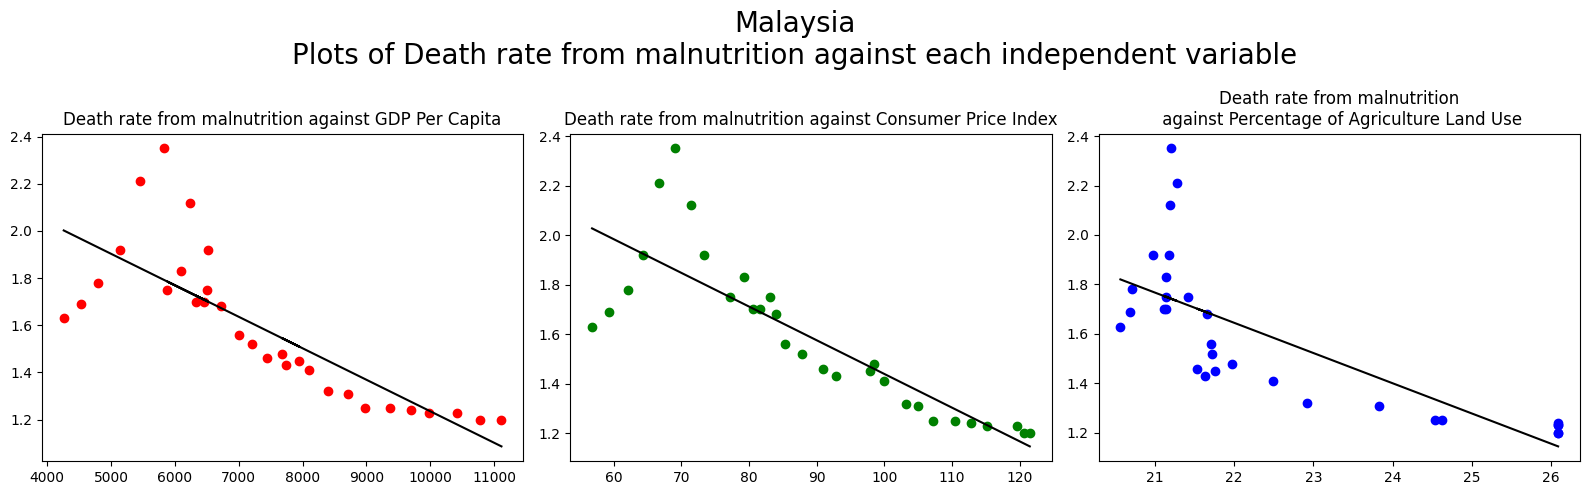

For Malaysia:
The R-squared value for Death rate from malnutrition against GDP Per Capita is 0.6441184999096056
The R-squared value for Death rate from malnutrition against Consumer Price Index is 0.7156010409751586
The R-squared value for Death rate from malnutrition against Percentage of Agriculture Land Use is 0.5658607363960112


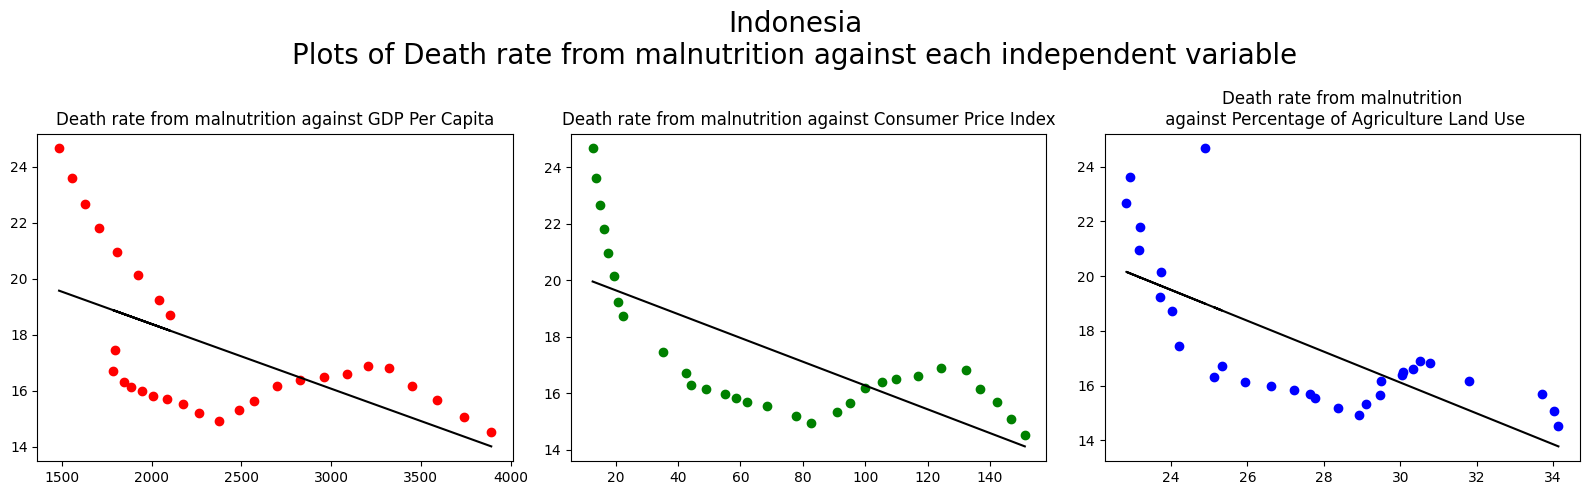

For Indonesia:
The R-squared value for Death rate from malnutrition against GDP Per Capita is 0.3513262373756019
The R-squared value for Death rate from malnutrition against Consumer Price Index is 0.5023090981824206
The R-squared value for Death rate from malnutrition against Percentage of Agriculture Land Use is 0.5074766015749822


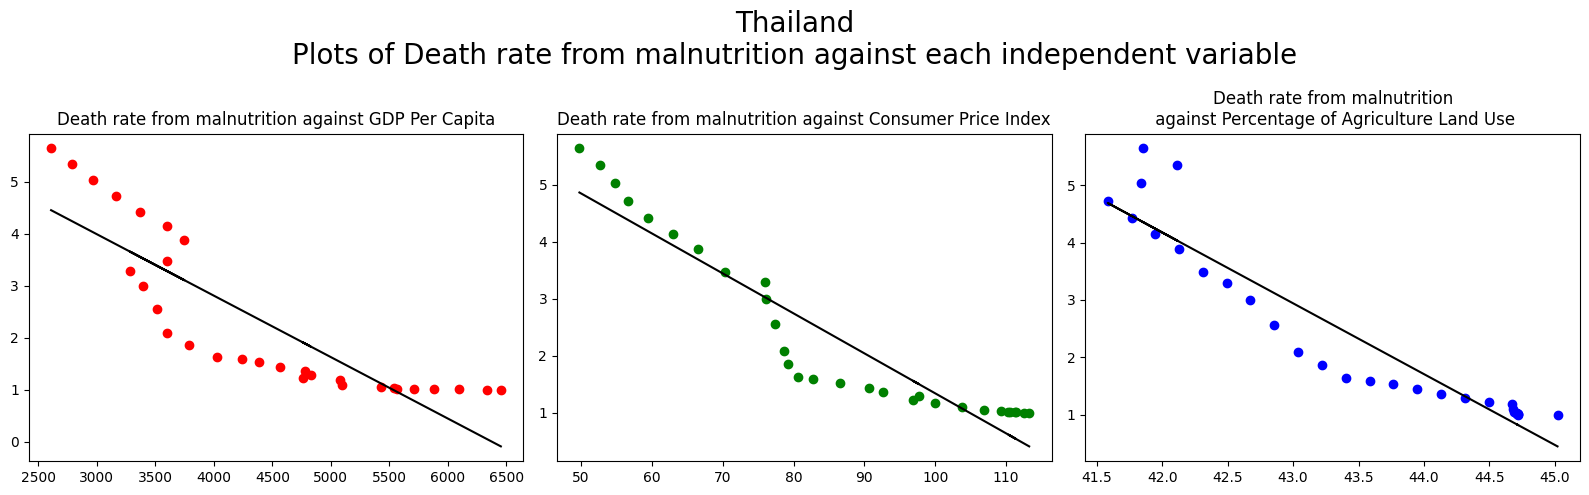

For Thailand:
The R-squared value for Death rate from malnutrition against GDP Per Capita is 0.7365194624507744
The R-squared value for Death rate from malnutrition against Consumer Price Index is 0.8808840712978696
The R-squared value for Death rate from malnutrition against Percentage of Agriculture Land Use is 0.8851455455956158


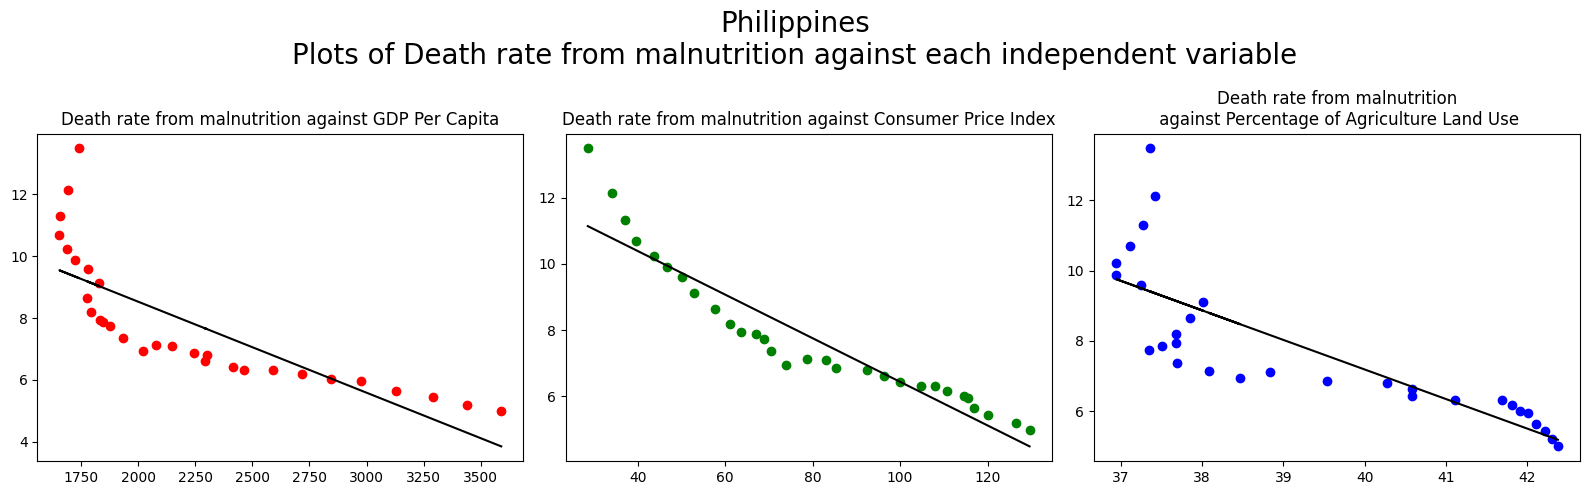

For Philippines:
The R-squared value for Death rate from malnutrition against GDP Per Capita is 0.6310985333955464
The R-squared value for Death rate from malnutrition against Consumer Price Index is 0.878460616199647
The R-squared value for Death rate from malnutrition against Percentage of Agriculture Land Use is 0.6441318145574416


In [490]:
# Plotting the dependent variable against each of the independent variable for each country
# includes r square for each subplot to check the linear relationship for each variable
three_subplots_variables("Malaysia", malaysia_df, malaysia_features, malaysia_target)
three_subplots_variables("Indonesia", indonesia_df, indonesia_features, indonesia_target)
three_subplots_variables("Thailand", thailand_df, thailand_features, thailand_target)
three_subplots_variables("Philippines", philippines_df, philippines_features, philippines_target)

### Explanation of the above plots

The above plots are the dependent variables plotted against the independent variables of each country. The R-squared values are also calculated to observe if each independent variable possibly is linearly correlated to the dependent variable and whether a substantial proportion of the variability in the dependent variable is explained by the independent variables before deciding to use these variables to build a multiple linear regression model

Using the R-squared values from all the plots above, it can be observed that each variable for all countries have at least a moderate R-squared value. Indonesia has the lowest R-squared values for all variables (R-squared values: 0.3513262373756019 for GDP, 0.5023090981824206 for CPI, 0.5074766015749822 for Percentage Agriculture Land Use). This could mean that relative to the other countries, the independent variables might not explain much of the variance in the death rate from malnutrition. Hence, it might mean that these predictor variables might have a linear relation with the dependent variable, death rate resulting from malnutrition.

The other countries have comparatively better R-square values which proves that each variable has some linear correlation to the dependent variable.


### Building the multilinear regression model

To build the multilinear regression model, we will split each country's datasets into train sets and test sets. The train set will be used to build the multiple linear regression model. After which, the test set will be used to predict values using the multiple linear regression model resulting from the train set.

Random seed = 100 is used to ensure consistent results for analysis purposes. However, when building an actual model to use, using a random seed is not necessary.

In [491]:
# calls the function to build a multiple linear regression model using each country's feature and targets
malaysia_beta, malaysia_pred, malaysia_features_test, malaysia_target_test = build_model(malaysia_features, malaysia_target, random_state = 100, test_size=0.3)
indonesia_beta, indonesia_pred, indonesia_features_test, indonesia_target_test = build_model(indonesia_features, indonesia_target, random_state = 100, test_size=0.3)
thailand_beta, thailand_pred, thailand_features_test, thailand_target_test = build_model(thailand_features, thailand_target, random_state = 100, test_size=0.3)
philippines_beta, philippines_pred, philippines_features_test, philippines_target_test = build_model(philippines_features, philippines_target, random_state = 100, test_size=0.3)



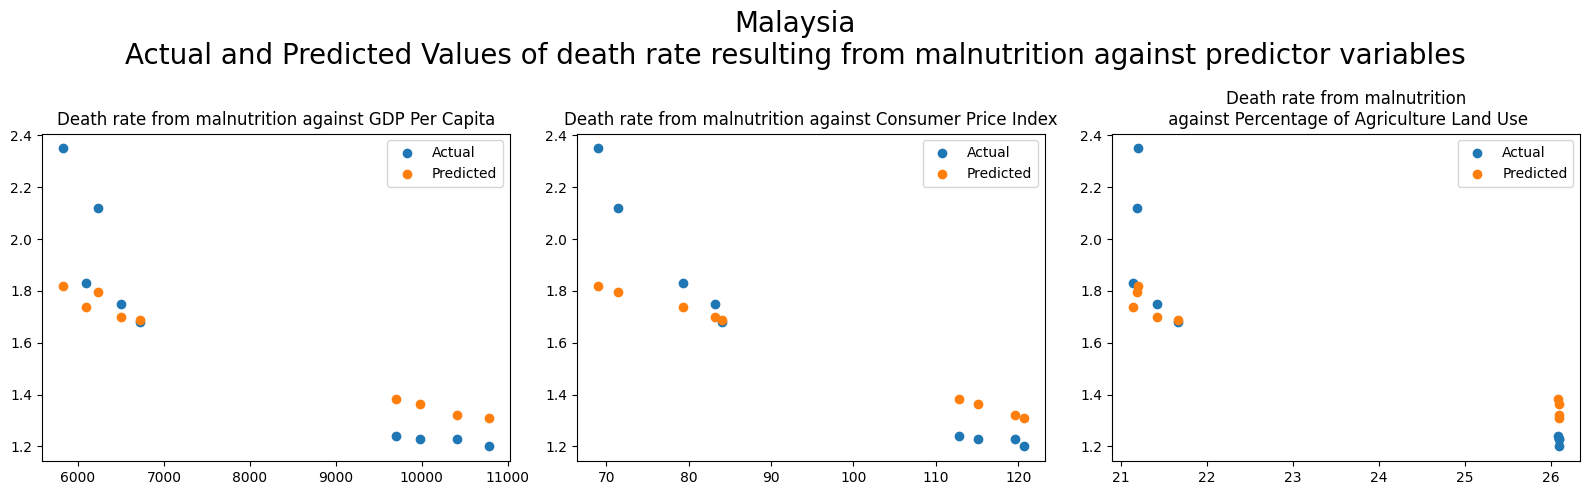

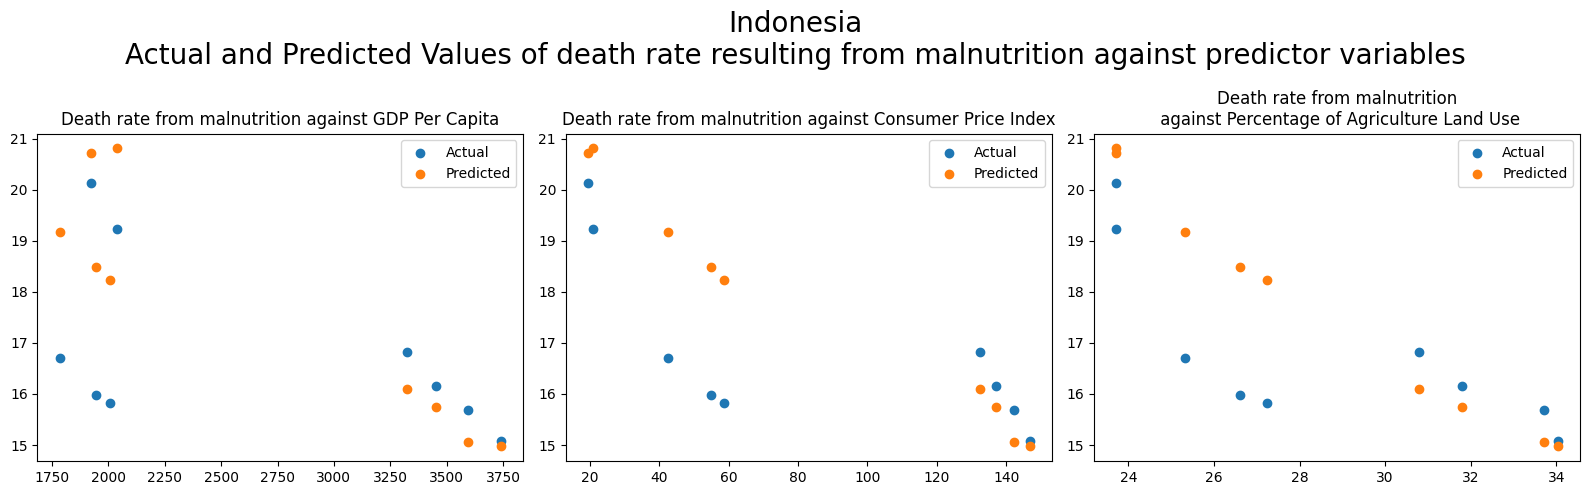

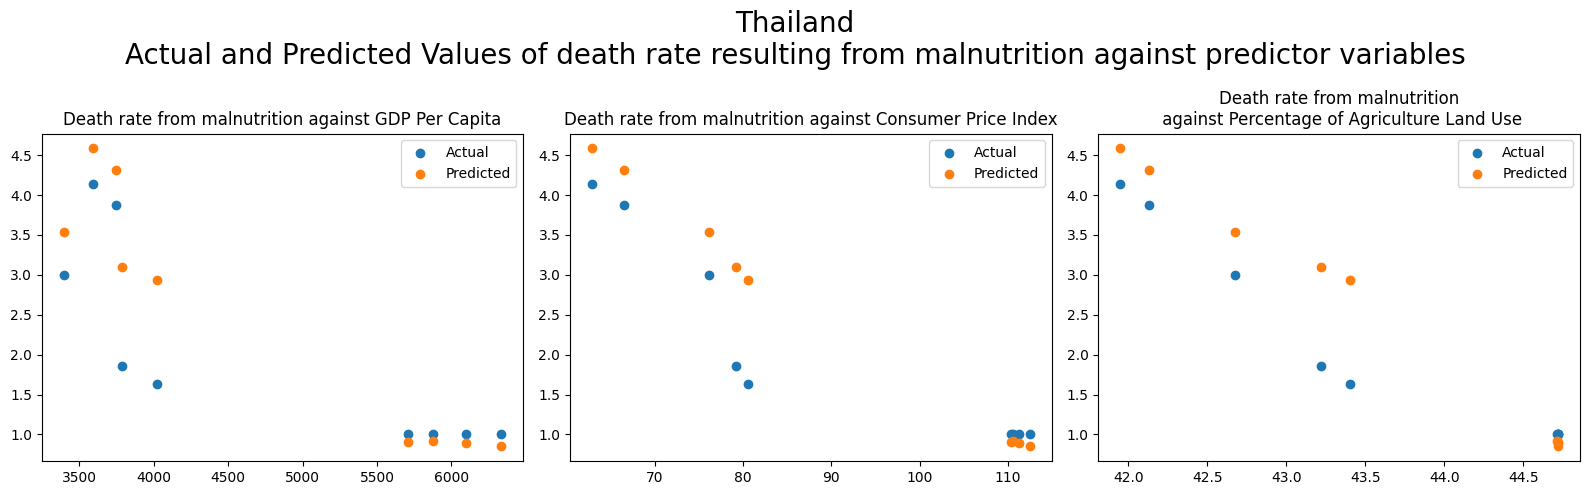

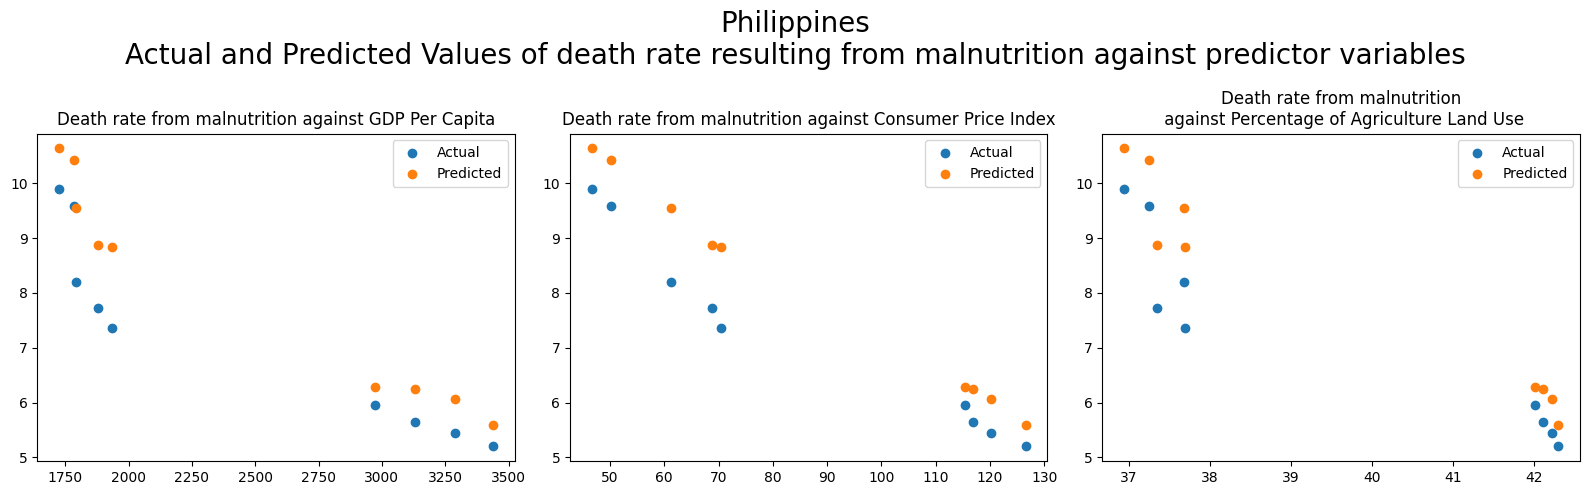

In [492]:
# plots the actual and predicted values for the test dataset of each country.
three_subplots_pred("Malaysia", malaysia_features_test, malaysia_target_test, malaysia_pred)
three_subplots_pred("Indonesia", indonesia_features_test, indonesia_target_test, indonesia_pred)
three_subplots_pred("Thailand", thailand_features_test, thailand_target_test, thailand_pred)
three_subplots_pred("Philippines", philippines_features_test, philippines_target_test, philippines_pred)

The data was split into 70% training data set and 30% test data set. The choice of data in the train set will always be randomised and the remainder will be the test set. The train set will be used to train a multiple linear regression model by computing the cost function and gradient descent. After which, the beta values for the multiple linear regression will be obtained. Thus, as a result, it is possible to predict values using the beta values and the features test data set. The predicted values can then be plotted alongside the actual values to visualise the accuracy of the trained multiple linear regression model. 

Other metrics need to be used to analyse the accuracy and the suitability of the model.

## Mathematical details

R-Squared values and mean squared errors are used to determine if the model is useful in predicting the death rates of the countries as they provide different perspectives on the accuracy and applicability of the model. R-Squared values are an indicator of how well predictor variables explain the variability in the dependent variable, while mean squared errors provide a measure of how well the model's predictions match the actual values.

$R^2 = 1 - \frac{SSR}{SST}$  
<br>
$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$ where $\hat{y}$ is the predicted value of ${y}$ and $\bar{y}$ is the mean of ${y}$
<br>
<br>
$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$



# Model Evaluation

## Chosen metric to evaluate final model

R-Squared value increases with the addition of predictors, even if those predictors do not have a meaningful relationship with the dependent variable. Hence, although both R-Squared values and Mean Squared Errors are used, Mean Squared Errors is the metric we used to determine the efficacy of our model.

## Code and result of the metric on your test data set

The code below shows the calculation of R-squared values and Mean Squared Error Values using the actual and predicted values of the test sets for each country.

In [493]:
# change target test set to a numpy array
malaysia_target = prepare_target(malaysia_target_test)
indonesia_target = prepare_target(indonesia_target_test)
thailand_target = prepare_target(thailand_target_test)
philippines_target = prepare_target(philippines_target_test)

In [494]:
# Calculate r2 score by using the actual values and the predicted values
malaysia_r2 = r2_score(malaysia_target, malaysia_pred)
indonesia_r2 = r2_score(indonesia_target, indonesia_pred)
thailand_r2 = r2_score(thailand_target, thailand_pred)
philippines_r2 = r2_score(philippines_target, philippines_pred)

# Calculate the mse using the actual values and the predicted values
malaysia_mse = mean_squared_error(malaysia_target, malaysia_pred)
indonesia_mse = mean_squared_error(indonesia_target, indonesia_pred)
thailand_mse = mean_squared_error(thailand_target, thailand_pred)
philippines_mse = mean_squared_error(philippines_target, philippines_pred)

Malaysia's R squared value, Mean Squared Error and Beta values

In [495]:
r2_string(malaysia_r2, "Malaysia")
mse_string(malaysia_mse, "Malaysia")
beta_values(malaysia_beta, "Malaysia")

The R-Squared for the multiple linear regression model for Malaysia is 0.6885255517307889
The Mean Squared Error for the multiple linear regression model for Malaysia is 0.050951067155148744
Beta values for multiple linear regression model of Malaysia: 
[[ 1.56857098]
 [-0.02846811]
 [-0.16534441]
 [-0.02388324]]


Indonesia's R squared value, Mean Squared Error and Beta values

In [496]:
r2_string(indonesia_r2, "Indonesia")
mse_string(indonesia_mse, "Indonesia")
beta_values(indonesia_beta, "Indonesia")

The R-Squared for the multiple linear regression model for Indonesia is 0.051667402611476065
The Mean Squared Error for the multiple linear regression model for Indonesia is 2.457448212261429
Beta values for multiple linear regression model of Indonesia: 
[[17.69856641]
 [ 1.07015405]
 [-1.87036225]
 [-1.46287987]]


Thailand's R squared value, Mean Squared Error and Beta values

In [497]:
r2_string(thailand_r2, "Thailand")
mse_string(thailand_mse, "Thailand")
beta_values(thailand_beta, "Thailand")

The R-Squared for the multiple linear regression model for Thailand is 0.7003249867304941
The Mean Squared Error for the multiple linear regression model for Thailand is 0.43880413276342856
Beta values for multiple linear regression model of Thailand: 
[[ 2.44714216]
 [ 0.07054904]
 [-0.91109182]
 [-0.72688491]]


Philippine's R squared value, Mean Squared Error and Beta values

In [498]:
r2_string(philippines_r2, "Philippines")
mse_string(philippines_mse, "Philippines")
beta_values(philippines_beta, "Philippines")

The R-Squared for the multiple linear regression model for Philippines is 0.7013479051486908
The Mean Squared Error for the multiple linear regression model for Philippines is 0.839113573246475
Beta values for multiple linear regression model of Philippines: 
[[ 8.05523581]
 [ 0.36228735]
 [-2.81594281]
 [ 0.46549162]]


## Attempt to improve efficiency of model

### Transforming the feature variables of Indonesia's dataframe

Multiple transformations were attempted but only the final transformation was included.

In [499]:
# shows first 5 rows of dataframe before transformation of variables
display(indonesia_df.head())

# Adds new columns with the appropriate transformation applied
indonesia_df = power_transform_features(indonesia_df, "GDP Per Capita (US$ 2015)", "Power 4 GDP Per Capita (US$ 2015)",4)
indonesia_df = power_transform_features(indonesia_df, "Consumer Price Index", "Power 4 Consumer Price Index", 4)
indonesia_df = squared_transform_features(indonesia_df, "Agricultural Land Use (%)", "Squared Agricultural Land Use (%)")

# shows first 5 rows of dataframe after transformation of variables 
display(indonesia_df.head())

,Country Name,Year,GDP Per Capita (US$ 2015),Consumer Price Index,Agricultural Land Use (%),"Death rate from protein-energy malnutrition per 100,000 people"
0,Indonesia,1990,1483.638032,12.652674,24.886148,24.66
1,Indonesia,1991,1556.806664,13.844436,22.921554,23.61
2,Indonesia,1992,1629.847978,14.886025,22.826057,22.66
3,Indonesia,1993,1706.952365,16.325785,23.193142,21.80
4,Indonesia,1994,1805.603885,17.718702,23.168302,20.95


,Country Name,Year,GDP Per Capita (US$ 2015),Consumer Price Index,Agricultural Land Use (%),"Death rate from protein-energy malnutrition per 100,000 people",Power 4 GDP Per Capita (US$ 2015),Power 4 Consumer Price Index,Squared Agricultural Land Use (%)
0,Indonesia,1990,1483.638032,12.652674,24.886148,24.66,4.845201e+12,25628.856666,619.320386
1,Indonesia,1991,1556.806664,13.844436,22.921554,23.61,5.874065e+12,36736.782997,525.397648
2,Indonesia,1992,1629.847978,14.886025,22.826057,22.66,7.056485e+12,49103.785164,521.028876
3,Indonesia,1993,1706.952365,16.325785,23.193142,21.80,8.489568e+12,71038.917645,537.921829
4,Indonesia,1994,1805.603885,17.718702,23.168302,20.95,1.062894e+13,98566.116243,536.770196


In [500]:
# extract the new features and target for each country
new_columns = ["Power 4 GDP Per Capita (US$ 2015)" ,"Power 4 Consumer Price Index" ,"Squared Agricultural Land Use (%)"]
indonesia_features, indonesia_target = get_features_targets(indonesia_df, new_columns, ["Death rate from protein-energy malnutrition per 100,000 people"])

# Build the new multiple linear regression model using the new transformed features
indonesia_beta, indonesia_pred, indonesia_features_test, indonesia_target_test = build_model(indonesia_features, indonesia_target, random_state = 100, test_size=0.3)
indonesia_target = prepare_target(indonesia_target_test)

# Computing the R-squared value and Mean Squared Error
indonesia_r2 = r2_score(indonesia_target, indonesia_pred)
indonesia_mse = mean_squared_error(indonesia_target, indonesia_pred)
display(indonesia_features_test)

,Power 4 GDP Per Capita (US$ 2015),Power 4 Consumer Price Index,Squared Agricultural Land Use (%)
9,1.013688e+13,3.247278e+06,641.327380
26,1.421711e+14,3.519224e+08,1011.067105
28,1.959262e+14,4.635264e+08,1158.331949
13,1.630584e+13,1.181566e+07,741.477472
5,1.365626e+13,1.412927e+05,562.836382
12,1.427144e+13,9.096351e+06,707.786547
27,1.664328e+14,4.086801e+08,1136.681361
25,1.218716e+14,3.063743e+08,947.735166
6,1.729729e+13,1.920370e+05,562.574494


Indonesia's new R squared value, Mean Squared Error and Beta values after transformation

In [501]:
r2_string(indonesia_r2, "Indonesia")
mse_string(indonesia_mse, "Indonesia")
beta_values(indonesia_beta, "Indonesia")

The R-Squared for the multiple linear regression model for Indonesia is 0.30147054195483614
The Mean Squared Error for the multiple linear regression model for Indonesia is 1.8101243937117941
Beta values for multiple linear regression model of Indonesia: 
[[17.69856641]
 [ 0.43081583]
 [ 1.3613305 ]
 [-3.72773301]]


## Comparison with earlier attempts

Before the transformation of variables:
 
The R squared value for the multi linear regression model for Indonesia is 0.051667402611476065 <br>
The Mean Squared Error for the multi linear regression model for Indonesia is 2.457448212261429

After the transformation of GDP per capita and Consumer Price Index by power of 4 and the Percentage of Agriculture Land Use by power of 2:

The R squared for the multi linear regression model for Indonesia is 0.30147054195483614 <br>
The Mean Squared Error for the multi linear regression model for Indonesia is 1.8101243937117941

There is a decrease in the Mean Squared Error and an increase in the R Squared value after the transformation of variables. Firstly, the improvement in R-Squared value implies an improvement in linearity of the transformed variables against the dependent variable. Secondly, the decrease in Mean Squared Error implies that the transformation has helped improved the model's performance slightly, decreasing the error between the actual and predicted values. One of the possible reasons that the Mean Squared Error decreased is also because the relationship between the independent and dependent variables is more linear, as previously implied by the improvement in R-Squared Value



# Results and Conclusion

From our explanatory analysis and the final results, it can be observed that one multi-linear regression model is not a one-fit-all solution for all the countries as different countries have different circumstances and there might be other predictor variables, such as political stability, transport infrastructure, differences in food preferences. This model seems to be less suited for Indonesia as compared to the other countries studied as shown by its relatively higher Mean Squared Error value. This could be due to its rapid population growth, which can have a significant pressure on the demand for food. Such predictors may play a larger role in predicting the malnutrition rates compared to GDP Per Capita, CPI or percentage of agricultural land use. In essence, different countries may require different predictor variables or transformations of variables to achieve a more accurate model to predict death rates.

In conclusion, based on the results of the multiple-linear regression models trained using our datasets, the model for Malaysia, Thailand and Philippines is able to predict values that are relatively close to the actual values in the test data. Hence, the Malaysian, Thailand and Philippines Governments which are also part of ASEAN Governments can consider using this multiple linear regression model to predict the death rate resulting from malnutrition and take the appropriate action. However, in the case of Indonesia and any other ASEAN government whose multiple-linear regression model might not get a good fit, they can consider changing to other predictor variables or transforming the variables even more to achieve a good model fit.